**Recursion**

From [Runestone course](https://runestone.academy/runestone/books/published/pythonds/Introduction/GettingStartedwithData.html)

For each algorithm or data structure you learn about, try to program it from scratch in Python, from memory.

# Objectives

- To understand that complex problems that may otherwise be difficult to solve may have a simple recursive solution.
- To learn how to formulate programs recursively.
- To understand and apply the three laws of recursion.
- To understand recursion as a form of iteration.
- To implement the recursive formulation of a problem.
- To understand how recursion is implemented by a computer system.

# What is recursion?

- A problem solving method that involves breaking a problem down into smaller and smaller subproblems until it gets small enough to be solved trivially
- It usually involves a function calling itself
- It allows us to write elegant solutions to problems that may otherwise be difficult to program


# Calculating the sum of a list of numbers

Here's a problem that can be solved without recursion.

In [1]:
def listsum(numList):
    theSum = 0
    for i in numList:
        theSum = theSum + i
    return theSum

print(listsum([1,3,5,7,9]))

25


Imagine that we could not use while or for loops.

A simple way to think of it is to first think that addition is just a pair of numbers. We can think of the problem as a series of nested addition calls, as indicated by the parentheses. 

((((1+3)+5)+7)+9)
or
(1+(3+(5+(7+9))))


In [2]:
def listsum(numList):
    
    # Base case - addition is sum of 2 numbers
    if len(numList)==2:
        return numList[0] + numList[1]
    else:
        return numList[0] + listsum(numList[1:])

In [3]:
my_numList = [1,3,5,7,9]

listsum(my_numList)

25

In [4]:
# Note tutorial solution made the base case as having only one element remaining
# but we arrive at the same number

def listsum(numList):
    if len(numList) == 1:
        return numList[0]
    else:
        return numList[0] + listsum(numList[1:])

print(listsum([1,3,5,7,9]))


25


# The three laws of recursion

1. A recursive algorithm must have a base case.
2. A recursive algorithm must change its state and move toward the base case.
3. A recursive algorithm must call itself, recursively.

A **base case** is the condition that allows the algorithm to stop recursing. A base case is typically a problem that is small enough to solve directly.

To obey the second law, we must **arrange for a change of state that moves the algorithm toward the base case**. A change of state means that some data that the algorithm is using is modified. **Usually the data that represents our problem gets smaller** in some way (e.g. shortening the list).

The final law is that **the algorithm must call itself**. This is the very definition of recursion. When we talk about recursion it may seem that we are talking ourselves in circles. We have a problem to solve with a function, but that function solves the problem by calling itself. *Let the algorithm do the work.*



# Converting an integer to a string in any base

Let's suppose that we want to convert an integer into a string in some base between binary and hexadecimal. For example, the integer 10 would be "10" in decimal or "1010" in binary. (Of course, assume we can't simply call str(10)).

This problem can be approached in different ways, including as a stack, but the recursive formulation of the problem is very elegant. Suppose we're looking to convert the number 769 in base 10.

We can use a sequence of characters corresponding to the first 10 digits by using it as a lookup string, such as `convertString = "0123456789"`. For example, if the number is 9, then you can convert it into a string with `convString[9]`. A number less than 10 sounds like a good **base case**.

Knowing the base case suggests that the algorithm will involve three components.
1. Reduce the original number to a series of single-digit numbers.
2. Convert the single digit-number to a string using a lookup.
3. Concatenate the single-digit strings together to form the final result.

**What strategy can we employ to change the state?** Reducing the number can be by subtraction or division, but division by the base we are trying to convert to seems like it would be a better approach. If we take 769 divided by 10, we would get 76 remainder 9. Both of these values can be useful. We can use the remainder (9) as our single digit to convert into a string and then we can take the 76 and enter that into the recursive function.


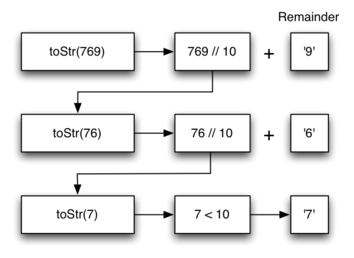

In [4]:
def toStr(n, base):
    convertString = "0123456789"
    new_n = n // base  # floor division
    r = n % base
    
    # Base case
    if n < base:
        return convertString[n]
    
    else:
        return toStr(new_n, base) + convertString[r]

In [2]:
toStr(769,10)

'769'

In [8]:
print(toStr(10,10))
print(toStr(10,2))

10
1010


Note that we make the recursive call first on line 6, then we add the string representation of the remainder. **By delaying the concatenation operation until after the recursive call has returned, we get the result in the proper order. This should remind you of our discussion of stacks back in the previous chapter.**

## (?) Exercise: Reverse string (didn't do this)

Write a function that takes a string as a parameter and returns a new string that is the reverse of the old string.

## Exercise: Palindrome

**Exercise:** Write a function that takes a string as a parameter and returns True if the string is a palindrome, False otherwise. Remember that a string is a palindrome if it is spelled the same both forward and backward. 

For bonus points, palindromes can also be phrases, but you need to remove the spaces and punctuation before checking

In [75]:
def isPalindrome(string):
    
    # Edits to string to accomodate phrases, capitalization, spaces, etc.
    import re
    string = string.lower()
    # Replace everything that isn't a letter
    string = re.sub('[^a-z]', '', string)
    
    # Base cases
    
    # If the original string has a length that is an odd number
    if len(string)==1:
        return True
    # If the original string has a length that is an even number
    if (len(string)==2) & (string[0]==string[1]):
        return True
    else:
        #print(string)
        if string[0]==string[-1]:
            return isPalindrome(string[1:-1])
        else:
            return False

In [76]:
isPalindrome('radar')

True

In [77]:
isPalindrome('kayak')

True

In [78]:
isPalindrome('aibohphobia')

True

In [79]:
isPalindrome('Aib ohph ?obia')

True

In [80]:
isPalindrome('Aib ohph ?obia')

True

In [82]:
isPalindrome("madam i’m adam")

True

In [81]:
isPalindrome('Go hang a salami; I’m a lasagna hog')

True

### Testing

In [70]:
my_string = 'Go hang a salami; I’m a lasagna hog'
my_string = my_string.lower()
re.sub('[^a-z]', '', my_string)

'gohangasalamiimalasagnahog'

In [63]:
my_string = my_string.lower()
print(my_string)
#.replace(['a:z'],'')

aib ohph ?obia


In [64]:
my_string

'aib ohph ?obia'

In [65]:
import re
my_string = 'Aib ohph ?obia'
re.sub('[^a-z]', '', my_string)

'ibohphobia'

# (?) Stack Frames: Implementing Recursion

Suppose that instead of concatenating the result of the recursive call to toStr with the string from convertString, we modified our algorithm to push the strings onto a stack instead of making the recursive call. 

# (?) Introduction: Visualizing Recursion

(this kept crashing)

In this section we will look at a couple of examples of using recursion to draw some interesting pictures. **As you watch these pictures take shape you will get some new insight into the recursive process that may be helpful in cementing your understanding of recursion.**

The tool we will use for our illustrations is Python’s turtle graphics module called turtle. The turtle module is standard with all versions of Python and is very easy to use. The metaphor is quite simple. You can create a turtle and the turtle can move forward, backward, turn left, turn right, etc. The turtle can have its tail up or down. When the turtle’s tail is down and the turtle moves it draws a line as it moves. To increase the artistic value of the turtle you can change the width of the tail as well as the color of the ink the tail is dipped in.

Here is a simple example to illustrate some turtle graphics basics. We will use the turtle module to draw a spiral recursively. ActiveCode 1 shows how it is done. After importing the turtle module we create a turtle. When the turtle is created it also creates a window for itself to draw in. Next we define the drawSpiral function. The base case for this simple function is when the length of the line we want to draw, as given by the len parameter, is reduced to zero or less. If the length of the line is longer than zero we instruct the turtle to go forward by len units and then turn right 90 degrees. The recursive step is when we call drawSpiral again with a reduced length. At the end of ActiveCode 1 you will notice that we call the function myWin.exitonclick(), this is a handy little method of the window that puts the turtle into a wait mode until you click inside the window, after which the program cleans up and exits.

In [1]:
# # kept crashing
# import turtle

# myTurtle = turtle.Turtle()
# myWin = turtle.Screen()

# def drawSpiral(myTurtle, lineLen):
#     if lineLen > 0:
#         myTurtle.forward(lineLen)
#         myTurtle.right(90)
#         drawSpiral(myTurtle,lineLen-5)

# drawSpiral(myTurtle,10)
# myWin.exitonclick()
# turtle.done() # added this to deal with the program freezing


Terminator: 

In [10]:
import turtle

def tree(branchLen,t):
    if branchLen > 5:
        t.forward(branchLen)
        t.right(20)
        tree(branchLen-15,t)
        t.left(40)
        tree(branchLen-15,t)
        t.right(20)
        t.backward(branchLen)

def main():
    t = turtle.Turtle()
    myWin = turtle.Screen()
    t.left(90)
    t.up()
    t.backward(100)
    t.down()
    t.color("green")
    tree(75,t)
    myWin.exitonclick()

main()


# (?) Sierpinski triangle

Depends on turtle so will just read.

Another fractal that exhibits the property of self-similarity is the Sierpinski triangle. An example is shown in Figure 3. The Sierpinski triangle illustrates a three-way recursive algorithm. The procedure for drawing a Sierpinski triangle by hand is simple. Start with a single large triangle. Divide this large triangle into four new triangles by connecting the midpoint of each side. Ignoring the middle triangle that you just created, apply the same procedure to each of the three corner triangles. Each time you create a new set of triangles, you recursively apply this procedure to the three smaller corner triangles. You can continue to apply this procedure indefinitely if you have a sharp enough pencil. Before you continue reading, you may want to try drawing the Sierpinski triangle yourself, using the method described.

Since we can continue to apply the algorithm indefinitely, what is the base case? **We will see that the base case is set arbitrarily as the number of times we want to divide the triangle into pieces.** Sometimes we call this number the “degree” of the fractal. 

# Complex recursive problems

- These are problems that are hard to solve using an interative programming style but are very elegant and easy when using recursion.
- Some problems might seem initially easy with recursion but is actually difficult.

# (?) Tower of Hanoi


Didn't fully get this.

[link](https://runestone.academy/runestone/books/published/pythonds/Recursion/TowerofHanoi.html)

The Tower of Hanoi puzzle was invented by the French mathematician Edouard Lucas in 1883. He was inspired by a legend that tells of a Hindu temple where the puzzle was presented to young priests. At the beginning of time, the priests were given three poles and a stack of 64 gold disks, each disk a little smaller than the one beneath it. Their assignment was to transfer all 64 disks from one of the three poles to another, with two important constraints. They could only move one disk at a time, and they could never place a larger disk on top of a smaller one. The priests worked very efficiently, day and night, moving one disk every second. When they finished their work, the legend said, the temple would crumble into dust and the world would vanish.

[Khan Academy](https://www.khanacademy.org/computing/computer-science/algorithms/towers-of-hanoi/a/towers-of-hanoi)

Here is a high-level outline of how to move a tower from the starting pole, to the goal pole, using an intermediate pole:

1. Move a tower of height-1 to an intermediate pole, using the final pole.
2. Move the remaining disk to the final pole.
3. Move the tower of height-1 from the intermediate pole to the final pole using the original pole.

In [5]:
# Runestone implementation

def moveTower(height,fromPole, toPole, withPole):
    if height >= 1:
        moveTower(height-1,fromPole,withPole,toPole)
        moveDisk(fromPole,toPole)
        moveTower(height-1,withPole,toPole,fromPole)

def moveDisk(fp,tp):
    print("moving disk from",fp,"to",tp)

moveTower(2,"A","C","B")

moving disk from A to B
moving disk from A to C
moving disk from B to C


Assume we're moving one whole stack of height 3 from A to C.

What is the base case? (n=1). Moving one disk from A (source) to C (destination).

What if n=2? Need to use the intermediate pole.
A to B, A to C, B to C.



In [41]:
# My implementation

def move_tower(height, source, dest, interm):
    
    # Base case
    if height==0:
        print("Move from ", source, "to", dest)
        
    if height >= 1:
        move_tower(height-1, source, interm, dest)   # This will move to the intermediate pole
        #move_tower(height-1, source, dest, interm)   # Then this goes to the base case
        move_tower(height-1, interm, dest, source)
    
    # no return needed

In [42]:
move_tower(1, "A", "C", "B")

Move from  A to B
Move from  B to C


In [43]:
move_tower(2, "A", "C", "B")

Move from  A to C
Move from  C to B
Move from  B to A
Move from  A to C


In [44]:
move_tower(3, "A", "C", "B")

Move from  A to B
Move from  B to C
Move from  C to A
Move from  A to B
Move from  B to C
Move from  C to A
Move from  A to B
Move from  B to C


# Exploring a Maze

# Dynamic programming

# Summary

- All recursive algorithms must have a base case.
- A recursive algorithm must change its state and make progress toward the base case.
- A recursive algorithm must call itself (recursively).
- Recursion can take the place of iteration in some cases.
- Recursive algorithms often map very naturally to a formal expression of the problem you are trying to solve.
- Recursion is not always the answer. Sometimes a recursive solution may be more computationally expensive than an alternative algorithm.

# Key terms

- base case
- decrypt
- dynamic programming
- recursion
- recursive call
- stack frame

# Discussion questions

1. Draw a call stack for the Tower of Hanoi problem. Assume that you start with a stack of three disks.
2. Using the recursive rules as described, draw a Sierpinski triangle using paper and pencil.
3. Using the dynamic programming algorithm for making change, find the smallest number of coins that you can use to make 33 cents in change. In addition to the usual coins assume that you have an 8 cent coin.

# Glossary

**base case**
A branch of the conditional statement in a recursive function that does not give rise to further recursive calls.

**data structure**
An organization of data for the purpose of making it easier to use.

**exception**
An error that occurs at runtime.

**handle an exception**
To prevent an exception from terminating a program by wrapping the block of code in a try / except construct.

**immutable data type**
A data type which cannot be modified. Assignments to elements or slices of immutable types cause a runtime error.

**infinite recursion**
A function that calls itself recursively without ever reaching the base case. Eventually, an infinite recursion causes a runtime error.

**mutable data type**
A data type which can be modified. All mutable types are compound types. Lists and dictionaries (see next chapter) are mutable data types; strings and tuples are not.

**raise**
To cause an exception by using the raise statement.

**recursion**
The process of calling the function that is already executing.

**recursive call**
The statement that calls an already executing function. Recursion can even be indirect — function f can call g which calls h, and h could make a call back to f.

**recursive definition**
A definition which defines something in terms of itself. To be useful it must include base cases which are not recursive. In this way it differs from a circular definition. Recursive definitions often provide an elegant way to express complex data structures.

**tuple**
A data type that contains a sequence of elements of any type, like a list, but is immutable. Tuples can be used wherever an immutable type is required, such as a key in a dictionary (see next chapter).

**tuple assignment**
An assignment to all of the elements in a tuple using a single assignment statement. Tuple assignment occurs in parallel rather than in sequence, making it useful for swapping values.



# Programming exercises

# --
